# Análisis de Sostenibilidad Computacional - Áreas Protegidas y Especies de Honduras

Este notebook realiza un análisis completo de los datos de áreas protegidas y distribución de especies en Honduras, incluyendo procesamiento de datos, análisis exploratorio, correlaciones y modelos predictivos.

## Datasets:
- `limpio_WDPA_WDOECM_Aug2025_Public_HND_csv.csv`: Datos de áreas protegidas de Honduras
- `limpio_points_data.csv`: Datos de puntos de ocurrencia de especies

## 1. Carga de Librerías y Datos Iniciales

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuraciones
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Librerías cargadas exitosamente")

Librerías cargadas exitosamente


In [2]:
# Cargar los datasets
try:
    # Datos de áreas protegidas
    areas_protegidas = pd.read_csv('data_limpios/limpio_WDPA_WDOECM_Aug2025_Public_HND_csv.csv')
    print(f"Áreas Protegidas cargadas: {areas_protegidas.shape}")
    
    # Datos de puntos de especies
    especies_puntos = pd.read_csv('data_limpios/limpio_points_data.csv')
    print(f"Puntos de Especies cargados: {especies_puntos.shape}")
    
    print("\n✅ Datasets cargados exitosamente")
    
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

Áreas Protegidas cargadas: (119, 31)
Puntos de Especies cargados: (1375, 20)

✅ Datasets cargados exitosamente


## 2. Exploración Inicial de los Datos

In [3]:
# Información básica de áreas protegidas
print("=== INFORMACIÓN DE ÁREAS PROTEGIDAS ===")
print(f"Forma del dataset: {areas_protegidas.shape}")
print(f"\nColumnas: {list(areas_protegidas.columns)}")
print(f"\nTipos de datos:")
print(areas_protegidas.dtypes)
print(f"\nPrimeras 5 filas:")
areas_protegidas.head()

=== INFORMACIÓN DE ÁREAS PROTEGIDAS ===
Forma del dataset: (119, 31)

Columnas: ['TYPE', 'WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG', 'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE', 'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE', 'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE', 'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC', 'PARENT_ISO3', 'ISO3', 'SUPP_INFO', 'CONS_OBJ']

Tipos de datos:
TYPE            object
WDPAID           int64
WDPA_PID        object
PA_DEF           int64
NAME            object
ORIG_NAME       object
DESIG           object
DESIG_ENG       object
DESIG_TYPE      object
IUCN_CAT        object
INT_CRIT        object
MARINE           int64
REP_M_AREA     float64
GIS_M_AREA     float64
REP_AREA       float64
GIS_AREA       float64
NO_TAKE         object
NO_TK_AREA       int64
STATUS          object
STATUS_YR        int64
GOV_TYPE        object
OWN_TYPE        object
MANG_AUTH       object
MANG_PLAN 

,TYPE,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,...,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO3,ISO3,SUPP_INFO,CONS_OBJ
0,polygon,95337,95337,1,parque nacional jeanette kawas,parque nacional jeanette kawas,"ramsar site, wetland of international importance","ramsar site, wetland of international importance",international,not reported,...,not reported,not reported,management plan is not implented but is available,state verified,1856,hn-at,hnd,hnd,not applicable,not applicable
1,polygon,201,201,1,río plátano,río plátano,unesco-mab biosphere reserve,unesco-mab biosphere reserve,international,not applicable,...,not reported,not reported,not reported,state verified,988,hn-gd,hnd,hnd,not applicable,not applicable
2,polygon,555625660,555625660,1,trifinio fraternidad,trifinio fraternidad,unesco-mab biosphere reserve,unesco-mab biosphere reserve,international,not applicable,...,not reported,instituto de conservación y desarrollo foresta...,not reported,state verified,988,not reported,hnd,hnd,not applicable,not applicable
3,polygon,555625661,555625661,1,"cacique lempira, señor de las montañas","cacique lempira, señor de las montañas",unesco-mab biosphere reserve,unesco-mab biosphere reserve,international,not applicable,...,not reported,el instituto de conservación y desarrollo fore...,not reported,state verified,988,not reported,hnd,hnd,not applicable,not applicable
4,polygon,18804,18804,1,montecristo trifinio,montecristo trifinio,parque nacional,national park,national,ii,...,multiple ownership,icf,existing,state verified,1927,hn-oc,hnd,hnd,not applicable,not applicable


In [4]:
# Información básica de especies
print("=== INFORMACIÓN DE ESPECIES ===")
print(f"Forma del dataset: {especies_puntos.shape}")
print(f"\nColumnas: {list(especies_puntos.columns)}")
print(f"\nTipos de datos:")
print(especies_puntos.dtypes)
print(f"\nPrimeras 5 filas:")
especies_puntos.head()

=== INFORMACIÓN DE ESPECIES ===
Forma del dataset: (1375, 20)

Columnas: ['assessment_id', 'id_no', 'sci_name', 'presence', 'origin', 'seasonal', 'compiler', 'yrcompiled', 'citation', 'legend', 'subspecies', 'subpop', 'dist_comm', 'island', 'tax_comm', 'source', 'basisofrec', 'event_year', 'dec_long', 'dec_lat']

Tipos de datos:
assessment_id      int64
id_no              int64
sci_name          object
presence           int64
origin             int64
seasonal           int64
compiler          object
yrcompiled         int64
citation          object
legend            object
subspecies        object
subpop            object
dist_comm         object
island            object
tax_comm          object
source            object
basisofrec        object
event_year       float64
dec_long         float64
dec_lat          float64
dtype: object

Primeras 5 filas:


,assessment_id,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,legend,subspecies,subpop,dist_comm,island,tax_comm,source,basisofrec,event_year,dec_long,dec_lat
0,68104636,32954,swietenia humilis,1,1,1,megan barstow,2018,gta,extant (resident),desconocido,desconocido,ãrbol de 10 m. cã¡psulas cafã©s.,desconocido,desconocido,ibunam,preservedspecimen,1996.0,-95.009722,16.667222
1,68104718,32293,swietenia macrophylla,1,1,1,megan barstow,2023,gta,extant (resident),desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,preservedspecimen,1983.0,-91.106129,16.800513
2,163593472,163585151,critoniadelphus nubigenus,1,1,1,inecol,2020,inecol 2021,extant (resident),desconocido,desconocido,nd,desconocido,desconocido,us,preservedspecimen,1896.0,-91.600533,15.252200
3,68104636,32954,swietenia humilis,1,1,1,megan barstow,2018,gta,extant (resident),desconocido,desconocido,desconocido,desconocido,desconocido,inecol,preservedspecimen,1996.0,-104.825000,22.011667
4,68104718,32293,swietenia macrophylla,1,1,1,megan barstow,2023,gta,extant (resident),desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,preservedspecimen,1993.0,-90.925000,16.125000


## 3. Procesamiento de Datos - Manejo de Valores Faltantes

In [5]:
# Análisis de valores faltantes en áreas protegidas
print("=== VALORES FALTANTES EN ÁREAS PROTEGIDAS ===")
missing_areas = areas_protegidas.isnull().sum()
missing_percent_areas = (missing_areas / len(areas_protegidas)) * 100

missing_df_areas = pd.DataFrame({
    'Columna': missing_areas.index,
    'Valores_Faltantes': missing_areas.values,
    'Porcentaje': missing_percent_areas.values
}).sort_values('Valores_Faltantes', ascending=False)

print(missing_df_areas[missing_df_areas['Valores_Faltantes'] > 0])

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
missing_data_areas = missing_df_areas[missing_df_areas['Valores_Faltantes'] > 0]
if not missing_data_areas.empty:
    plt.bar(missing_data_areas['Columna'], missing_data_areas['Porcentaje'])
    plt.title('Porcentaje de Valores Faltantes por Columna - Áreas Protegidas')
    plt.xticks(rotation=45)
    plt.ylabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes en el dataset de áreas protegidas")

=== VALORES FALTANTES EN ÁREAS PROTEGIDAS ===
Empty DataFrame
Columns: [Columna, Valores_Faltantes, Porcentaje]
Index: []
No hay valores faltantes en el dataset de áreas protegidas


<Figure size 1200x600 with 0 Axes>

=== VALORES FALTANTES EN ESPECIES ===
       Columna  Valores_Faltantes  Porcentaje
10  subspecies                 56    4.072727
13      island                 56    4.072727
12   dist_comm                 56    4.072727
11      subpop                 56    4.072727
14    tax_comm                 55    4.000000
16  basisofrec                 39    2.836364


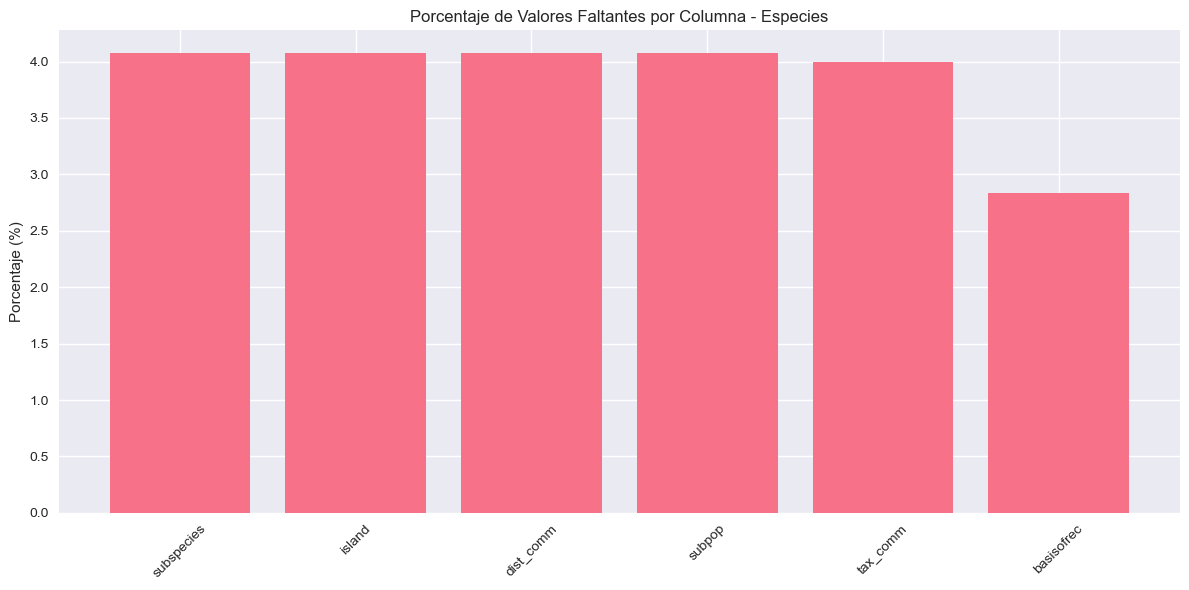

In [6]:
# Análisis de valores faltantes en especies
print("=== VALORES FALTANTES EN ESPECIES ===")
missing_especies = especies_puntos.isnull().sum()
missing_percent_especies = (missing_especies / len(especies_puntos)) * 100

missing_df_especies = pd.DataFrame({
    'Columna': missing_especies.index,
    'Valores_Faltantes': missing_especies.values,
    'Porcentaje': missing_percent_especies.values
}).sort_values('Valores_Faltantes', ascending=False)

print(missing_df_especies[missing_df_especies['Valores_Faltantes'] > 0])

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
missing_data_especies = missing_df_especies[missing_df_especies['Valores_Faltantes'] > 0]
if not missing_data_especies.empty:
    plt.bar(missing_data_especies['Columna'], missing_data_especies['Porcentaje'])
    plt.title('Porcentaje de Valores Faltantes por Columna - Especies')
    plt.xticks(rotation=45)
    plt.ylabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes en el dataset de especies")

## 4. Limpieza y Eliminación de Duplicados

In [7]:
# Identificar y eliminar duplicados en áreas protegidas
print("=== ANÁLISIS DE DUPLICADOS - ÁREAS PROTEGIDAS ===")
print(f"Registros originales: {len(areas_protegidas)}")
print(f"Registros duplicados: {areas_protegidas.duplicated().sum()}")

# Eliminar duplicados completos
areas_protegidas_clean = areas_protegidas.drop_duplicates()
print(f"Registros después de eliminar duplicados: {len(areas_protegidas_clean)}")

# Verificar duplicados por WDPAID (ID único)
if 'WDPAID' in areas_protegidas_clean.columns:
    duplicados_id = areas_protegidas_clean['WDPAID'].duplicated().sum()
    print(f"Duplicados por WDPAID: {duplicados_id}")
    if duplicados_id > 0:
        areas_protegidas_clean = areas_protegidas_clean.drop_duplicates(subset=['WDPAID'])
        print(f"Registros después de eliminar duplicados por ID: {len(areas_protegidas_clean)}")

=== ANÁLISIS DE DUPLICADOS - ÁREAS PROTEGIDAS ===
Registros originales: 119
Registros duplicados: 0
Registros después de eliminar duplicados: 119
Duplicados por WDPAID: 1
Registros después de eliminar duplicados por ID: 118


In [8]:
# Identificar y eliminar duplicados en especies
print("=== ANÁLISIS DE DUPLICADOS - ESPECIES ===")
print(f"Registros originales: {len(especies_puntos)}")
print(f"Registros duplicados: {especies_puntos.duplicated().sum()}")

# Eliminar duplicados completos
especies_puntos_clean = especies_puntos.drop_duplicates()
print(f"Registros después de eliminar duplicados: {len(especies_puntos_clean)}")

# Verificar duplicados por coordenadas y especie
if all(col in especies_puntos_clean.columns for col in ['dec_long', 'dec_lat', 'sci_name']):
    duplicados_coords = especies_puntos_clean.duplicated(subset=['dec_long', 'dec_lat', 'sci_name']).sum()
    print(f"Duplicados por coordenadas y especie: {duplicados_coords}")
    if duplicados_coords > 0:
        especies_puntos_clean = especies_puntos_clean.drop_duplicates(subset=['dec_long', 'dec_lat', 'sci_name'])
        print(f"Registros después de eliminar duplicados por coordenadas y especie: {len(especies_puntos_clean)}")

=== ANÁLISIS DE DUPLICADOS - ESPECIES ===
Registros originales: 1375
Registros duplicados: 0
Registros después de eliminar duplicados: 1375
Duplicados por coordenadas y especie: 91
Registros después de eliminar duplicados por coordenadas y especie: 1284


## 5. Estandarización de Variables

In [9]:
# Identificar columnas numéricas y categóricas en áreas protegidas
print("=== ESTANDARIZACIÓN - ÁREAS PROTEGIDAS ===")
numeric_cols_areas = areas_protegidas_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_areas = areas_protegidas_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Columnas numéricas: {numeric_cols_areas}")
print(f"Columnas categóricas: {categorical_cols_areas}")

# Estandarizar columnas de texto (lowercase, strip)
for col in categorical_cols_areas:
    if areas_protegidas_clean[col].dtype == 'object':
        areas_protegidas_clean[col] = areas_protegidas_clean[col].astype(str).str.lower().str.strip()

print("\n✅ Variables categóricas estandarizadas (lowercase, sin espacios)")

=== ESTANDARIZACIÓN - ÁREAS PROTEGIDAS ===
Columnas numéricas: ['WDPAID', 'PA_DEF', 'MARINE', 'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TK_AREA', 'STATUS_YR', 'METADATAID']
Columnas categóricas: ['TYPE', 'WDPA_PID', 'NAME', 'ORIG_NAME', 'DESIG', 'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'NO_TAKE', 'STATUS', 'GOV_TYPE', 'OWN_TYPE', 'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'SUB_LOC', 'PARENT_ISO3', 'ISO3', 'SUPP_INFO', 'CONS_OBJ']

✅ Variables categóricas estandarizadas (lowercase, sin espacios)


In [10]:
# Identificar columnas numéricas y categóricas en especies
print("=== ESTANDARIZACIÓN - ESPECIES ===")
numeric_cols_especies = especies_puntos_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_especies = especies_puntos_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Columnas numéricas: {numeric_cols_especies}")
print(f"Columnas categóricas: {categorical_cols_especies}")

# Estandarizar columnas de texto
for col in categorical_cols_especies:
    if especies_puntos_clean[col].dtype == 'object':
        especies_puntos_clean[col] = especies_puntos_clean[col].astype(str).str.lower().str.strip()

# Estandarizar nombres científicos (formato correcto)
if 'sci_name' in especies_puntos_clean.columns:
    especies_puntos_clean['sci_name'] = especies_puntos_clean['sci_name'].str.title()

print("\n✅ Variables categóricas estandarizadas")
print("✅ Nombres científicos estandarizados")

=== ESTANDARIZACIÓN - ESPECIES ===
Columnas numéricas: ['assessment_id', 'id_no', 'presence', 'origin', 'seasonal', 'yrcompiled', 'event_year', 'dec_long', 'dec_lat']
Columnas categóricas: ['sci_name', 'compiler', 'citation', 'legend', 'subspecies', 'subpop', 'dist_comm', 'island', 'tax_comm', 'source', 'basisofrec']

✅ Variables categóricas estandarizadas
✅ Nombres científicos estandarizados


## 6. Tratamiento de Datos Inconsistentes

In [11]:
# Verificar rangos de coordenadas válidas para Honduras
print("=== VALIDACIÓN DE COORDENADAS - ESPECIES ===")

# Rangos aproximados de Honduras: 
# Latitud: 12.98° a 16.51° N
# Longitud: -89.35° a -82.54° W

if 'dec_lat' in especies_puntos_clean.columns and 'dec_long' in especies_puntos_clean.columns:
    # Identificar coordenadas fuera de Honduras
    coordenadas_invalidas = (
        (especies_puntos_clean['dec_lat'] < 12.0) | (especies_puntos_clean['dec_lat'] > 17.0) |
        (especies_puntos_clean['dec_long'] < -110.0) | (especies_puntos_clean['dec_long'] > -80.0)
    )
    
    print(f"Registros con coordenadas fuera de rango: {coordenadas_invalidas.sum()}")
    print(f"Total de registros: {len(especies_puntos_clean)}")
    print(f"Porcentaje fuera de rango: {(coordenadas_invalidas.sum()/len(especies_puntos_clean)*100):.2f}%")
    
    # Mostrar algunos ejemplos de coordenadas fuera de rango
    if coordenadas_invalidas.sum() > 0:
        print("\nEjemplos de coordenadas fuera de rango:")
        ejemplos = especies_puntos_clean[coordenadas_invalidas][['sci_name', 'dec_lat', 'dec_long']].head(10)
        print(ejemplos)
        
        # Crear una nueva columna para marcar registros válidos para Honduras
        especies_puntos_clean['coordenadas_validas_hn'] = ~coordenadas_invalidas
        print(f"\n✅ Columna 'coordenadas_validas_hn' creada para filtrar datos de Honduras")

=== VALIDACIÓN DE COORDENADAS - ESPECIES ===
Registros con coordenadas fuera de rango: 801
Total de registros: 1284
Porcentaje fuera de rango: 62.38%

Ejemplos de coordenadas fuera de rango:
                 sci_name    dec_lat    dec_long
3       Swietenia Humilis  22.011667 -104.825000
5   Swietenia Macrophylla  20.120019  -97.569567
6   Swietenia Macrophylla  18.700958  -89.206636
9       Swietenia Humilis  22.266667 -104.583333
10      Swietenia Humilis  18.391667  -99.591667
11      Swietenia Humilis  20.843709 -105.415395
12  Swietenia Macrophylla  18.454167 -103.555000
13      Swietenia Humilis  18.056944  -89.288333
15  Swietenia Macrophylla  20.537500  -90.420833
17      Swietenia Humilis  18.024121 -101.106263

✅ Columna 'coordenadas_validas_hn' creada para filtrar datos de Honduras


In [12]:
# Verificar años válidos
print("=== VALIDACIÓN DE AÑOS - ESPECIES ===")

if 'event_year' in especies_puntos_clean.columns:
    # Años válidos: 1800 - 2025
    años_invalidos = (
        (especies_puntos_clean['event_year'] < 1800) | 
        (especies_puntos_clean['event_year'] > 2025) |
        (especies_puntos_clean['event_year'] == 0)
    )
    
    print(f"Registros con años inválidos: {años_invalidos.sum()}")
    
    if años_invalidos.sum() > 0:
        print("\nEjemplos de años inválidos:")
        ejemplos_años = especies_puntos_clean[años_invalidos][['sci_name', 'event_year']].head(10)
        print(ejemplos_años)
        
        # Marcar años válidos
        especies_puntos_clean['año_valido'] = ~años_invalidos
        print(f"\n✅ Columna 'año_valido' creada")

=== VALIDACIÓN DE AÑOS - ESPECIES ===
Registros con años inválidos: 35

Ejemplos de años inválidos:
                  sci_name  event_year
59   Swietenia Macrophylla         0.0
98   Swietenia Macrophylla         0.0
125  Swietenia Macrophylla         0.0
139  Swietenia Macrophylla         0.0
286  Swietenia Macrophylla         0.0
357  Swietenia Macrophylla         0.0
429  Swietenia Macrophylla         0.0
430  Swietenia Macrophylla         0.0
435  Swietenia Macrophylla         0.0
455      Swietenia Humilis         0.0

✅ Columna 'año_valido' creada


## 7. Análisis Exploratorio de Datos

=== ESTADÍSTICAS DESCRIPTIVAS - ÁREAS PROTEGIDAS ===
             WDPAID  PA_DEF      MARINE   REP_M_AREA   GIS_M_AREA  \
count  1.180000e+02   118.0  118.000000   118.000000   118.000000   
mean   1.836799e+08     1.0    0.245763   162.452128   171.401003   
std    2.624481e+08     0.0    0.568946  1026.103918  1022.832874   
min    2.000000e+02     1.0    0.000000     0.000000     0.000000   
25%    1.996150e+04     1.0    0.000000     0.000000     0.000000   
50%    4.104450e+04     1.0    0.000000     0.000000     0.000000   
75%    5.555830e+08     1.0    0.000000     0.000000     0.000000   
max    5.556975e+08     1.0    2.000000  9040.859500  9001.987251   

           REP_AREA     GIS_AREA  NO_TK_AREA    STATUS_YR   METADATAID  
count    118.000000   118.000000       118.0   118.000000   118.000000  
mean     830.681510   553.966796         0.0  1998.466102  1888.796610  
std     3212.822920  1558.265157         0.0    12.592687   172.604808  
min        0.010000     0.010004 

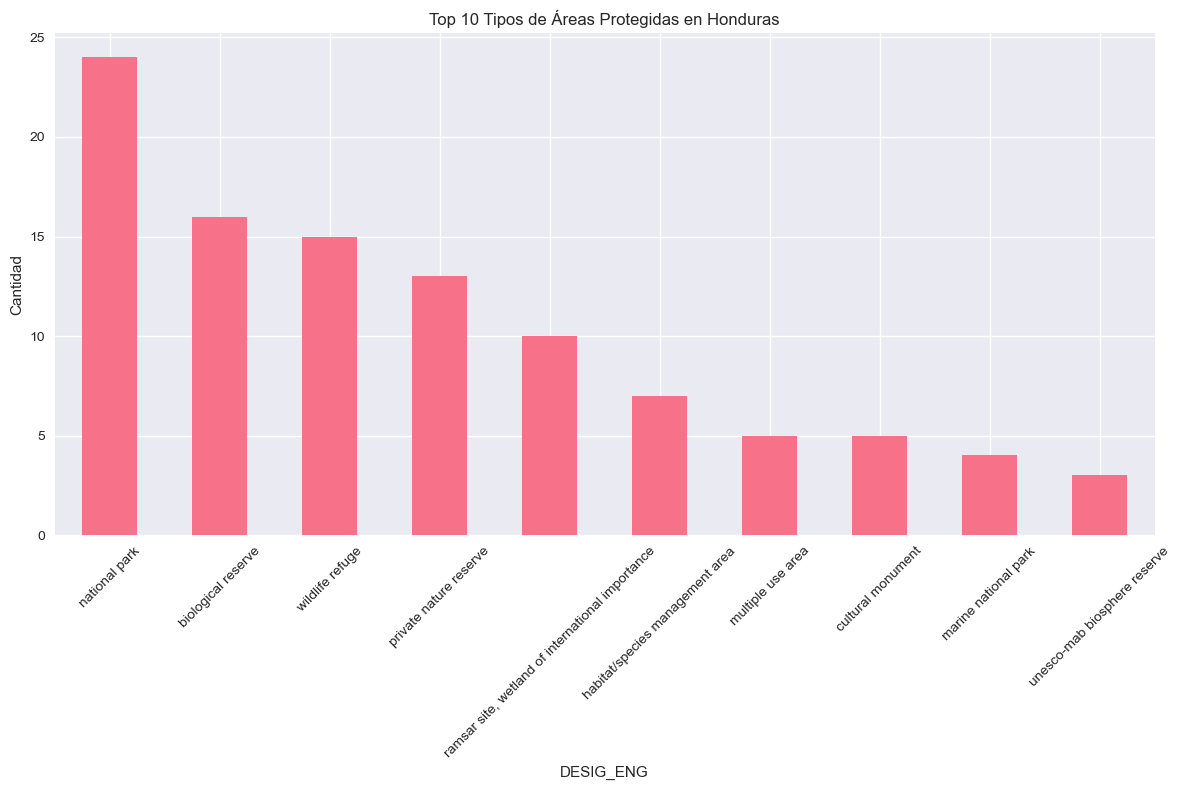

In [13]:
# Estadísticas descriptivas - Áreas Protegidas
print("=== ESTADÍSTICAS DESCRIPTIVAS - ÁREAS PROTEGIDAS ===")
if numeric_cols_areas:
    print(areas_protegidas_clean[numeric_cols_areas].describe())
else:
    print("No hay columnas numéricas en áreas protegidas")

# Distribución de tipos de áreas protegidas
if 'DESIG_ENG' in areas_protegidas_clean.columns:
    print("\n=== TIPOS DE ÁREAS PROTEGIDAS ===")
    tipos_areas = areas_protegidas_clean['DESIG_ENG'].value_counts()
    print(tipos_areas)
    
    # Visualización
    plt.figure(figsize=(12, 8))
    tipos_areas.head(10).plot(kind='bar')
    plt.title('Top 10 Tipos de Áreas Protegidas en Honduras')
    plt.xticks(rotation=45)
    plt.ylabel('Cantidad')
    plt.tight_layout()
    plt.show()

=== ESTADÍSTICAS DESCRIPTIVAS - ESPECIES ===
       assessment_id         id_no  presence  origin  seasonal   yrcompiled  \
count   1.284000e+03  1.284000e+03    1284.0  1284.0    1284.0  1284.000000   
mean    8.643138e+07  3.667160e+07       1.0     1.0       1.0  2020.753115   
std     4.305541e+07  6.778582e+07       0.0     0.0       0.0     2.307725   
min     2.007671e+06  3.229300e+04       1.0     1.0       1.0  2018.000000   
25%     6.810464e+07  3.229300e+04       1.0     1.0       1.0  2018.000000   
50%     6.810472e+07  3.295400e+04       1.0     1.0       1.0  2020.000000   
75%     6.810472e+07  1.918400e+05       1.0     1.0       1.0  2023.000000   
max     1.686514e+08  1.686157e+08       1.0     1.0       1.0  2023.000000   

        event_year     dec_long      dec_lat  
count  1284.000000  1284.000000  1284.000000  
mean   1933.915888   -90.131277    14.382016  
std     324.592725     9.606506     7.770897  
min       0.000000  -110.958611   -17.775000  
25%    1

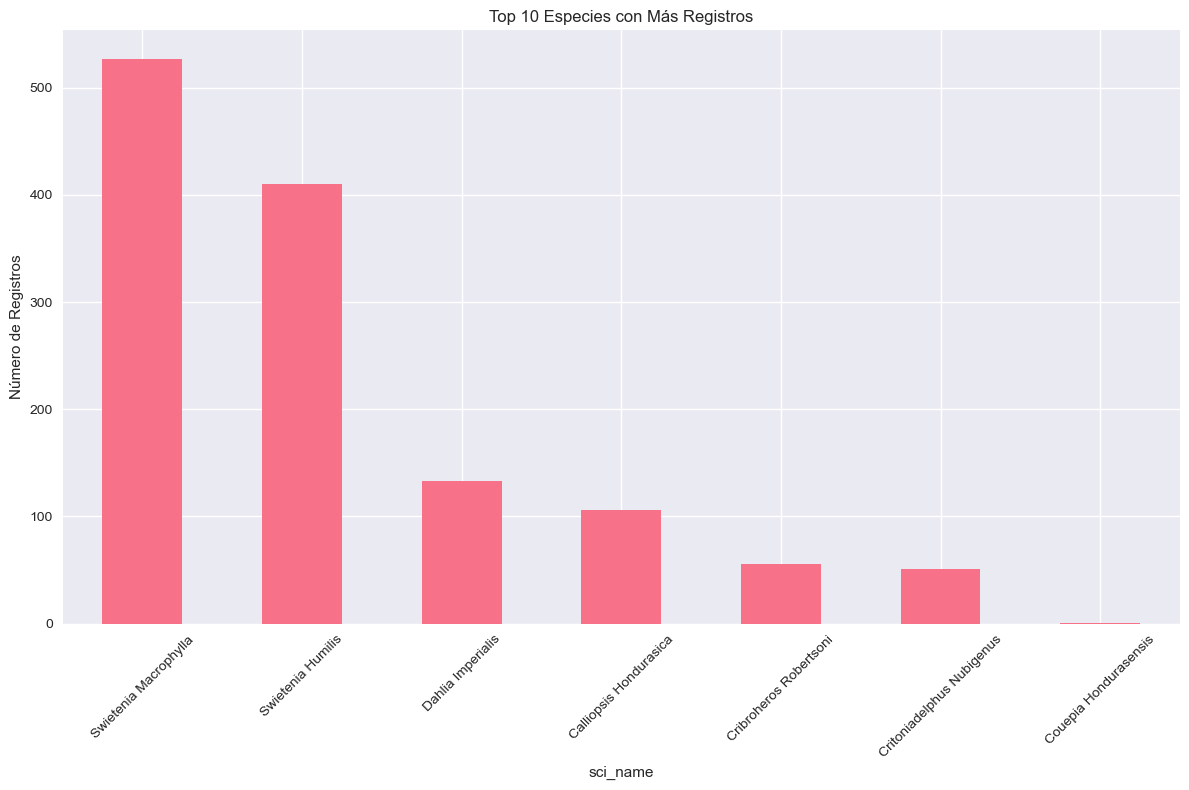

In [14]:
# Estadísticas descriptivas - Especies
print("=== ESTADÍSTICAS DESCRIPTIVAS - ESPECIES ===")
if numeric_cols_especies:
    print(especies_puntos_clean[numeric_cols_especies].describe())

# Distribución de especies
if 'sci_name' in especies_puntos_clean.columns:
    print("\n=== ESPECIES MÁS FRECUENTES ===")
    especies_freq = especies_puntos_clean['sci_name'].value_counts()
    print(especies_freq.head(10))
    
    # Visualización
    plt.figure(figsize=(12, 8))
    especies_freq.head(10).plot(kind='bar')
    plt.title('Top 10 Especies con Más Registros')
    plt.xticks(rotation=45)
    plt.ylabel('Número de Registros')
    plt.tight_layout()
    plt.show()

=== DISTRIBUCIÓN TEMPORAL DE REGISTROS ===


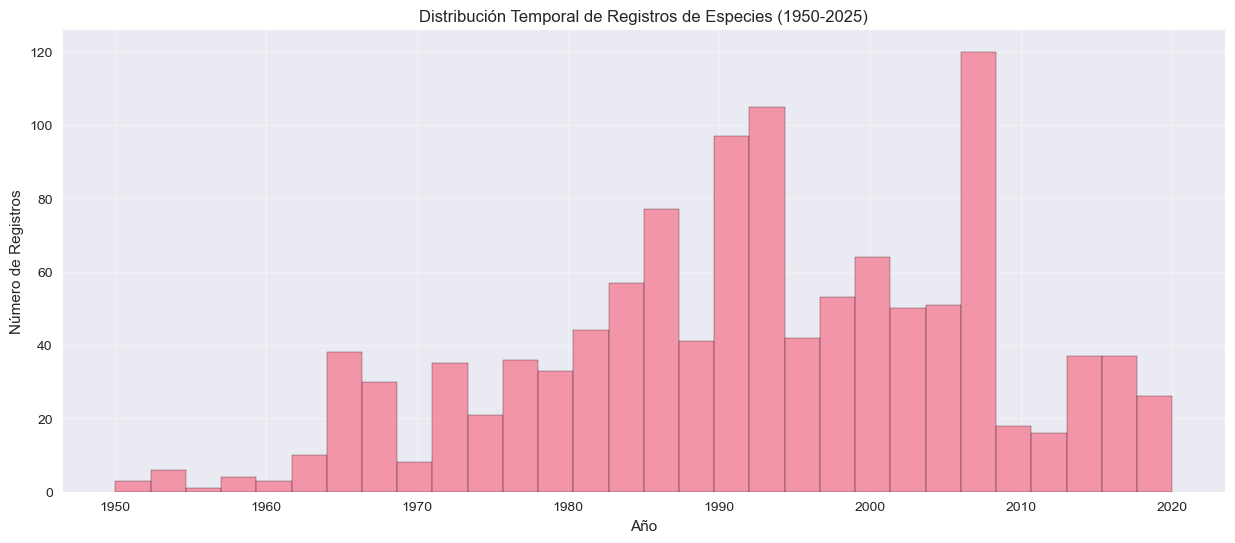


Registros por década:
decada
1950.0     14
1960.0     83
1970.0    119
1980.0    231
1990.0    333
2000.0    258
2010.0    119
2020.0      6
Name: count, dtype: int64


In [15]:
# Distribución temporal de registros de especies
if 'event_year' in especies_puntos_clean.columns:
    print("=== DISTRIBUCIÓN TEMPORAL DE REGISTROS ===")
    
    # Filtrar años válidos
    datos_temporales = especies_puntos_clean[
        (especies_puntos_clean['event_year'] >= 1950) & 
        (especies_puntos_clean['event_year'] <= 2025)
    ]
    
    plt.figure(figsize=(15, 6))
    plt.hist(datos_temporales['event_year'], bins=30, alpha=0.7, edgecolor='black')
    plt.title('Distribución Temporal de Registros de Especies (1950-2025)')
    plt.xlabel('Año')
    plt.ylabel('Número de Registros')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Estadísticas por década
    datos_temporales['decada'] = (datos_temporales['event_year'] // 10) * 10
    registros_por_decada = datos_temporales['decada'].value_counts().sort_index()
    print("\nRegistros por década:")
    print(registros_por_decada)

## 8. Análisis de Correlaciones

=== ANÁLISIS DE CORRELACIONES - ESPECIES ===


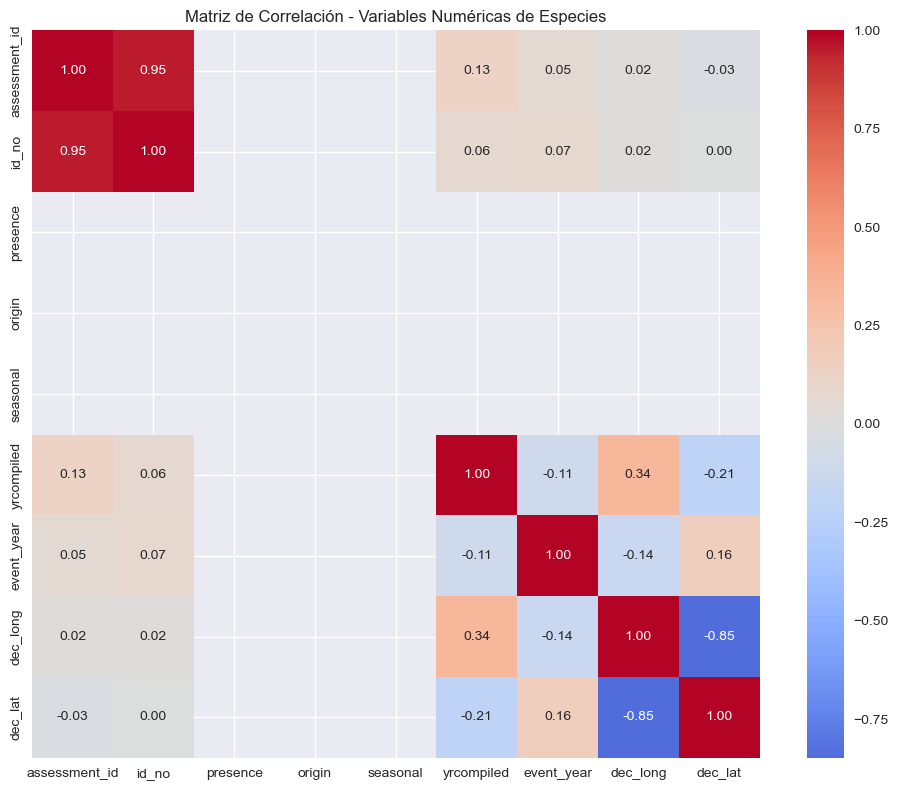


Matriz de correlación:
               assessment_id     id_no  presence  origin  seasonal  \
assessment_id       1.000000  0.949504       NaN     NaN       NaN   
id_no               0.949504  1.000000       NaN     NaN       NaN   
presence                 NaN       NaN       NaN     NaN       NaN   
origin                   NaN       NaN       NaN     NaN       NaN   
seasonal                 NaN       NaN       NaN     NaN       NaN   
yrcompiled          0.128701  0.064380       NaN     NaN       NaN   
event_year          0.053091  0.072597       NaN     NaN       NaN   
dec_long            0.017576  0.017444       NaN     NaN       NaN   
dec_lat            -0.032566  0.003015       NaN     NaN       NaN   

               yrcompiled  event_year  dec_long   dec_lat  
assessment_id    0.128701    0.053091  0.017576 -0.032566  
id_no            0.064380    0.072597  0.017444  0.003015  
presence              NaN         NaN       NaN       NaN  
origin                NaN         N

In [16]:
# Matriz de correlación para variables numéricas de especies
print("=== ANÁLISIS DE CORRELACIONES - ESPECIES ===")

if len(numeric_cols_especies) > 1:
    # Calcular matriz de correlación
    correlation_matrix_especies = especies_puntos_clean[numeric_cols_especies].corr()
    
    # Visualización con heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_especies, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                square=True,
                fmt='.2f')
    plt.title('Matriz de Correlación - Variables Numéricas de Especies')
    plt.tight_layout()
    plt.show()
    
    print("\nMatriz de correlación:")
    print(correlation_matrix_especies)
else:
    print("No hay suficientes variables numéricas para análisis de correlación en especies")

=== ANÁLISIS DE CORRELACIONES - ÁREAS PROTEGIDAS ===


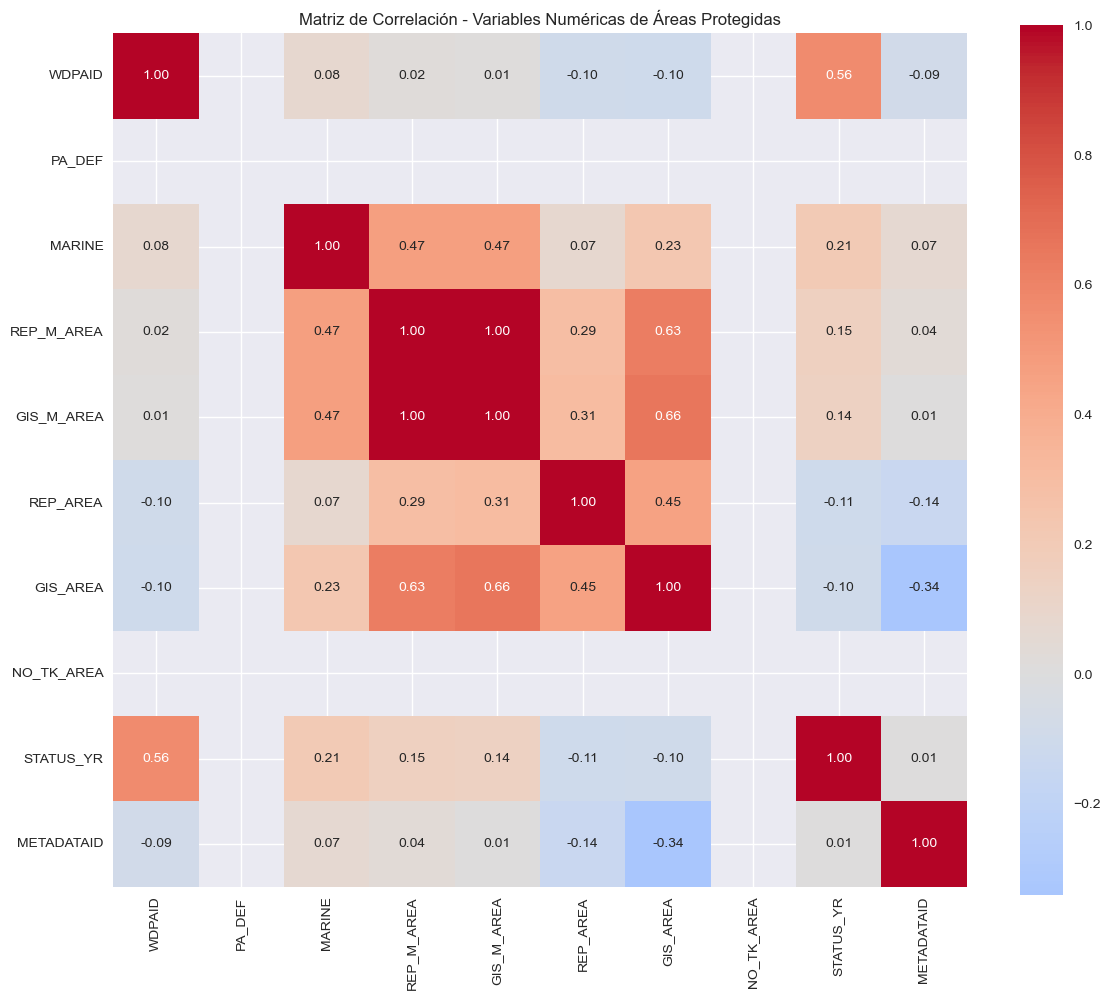


Matriz de correlación:
              WDPAID  PA_DEF    MARINE  REP_M_AREA  GIS_M_AREA  REP_AREA  \
WDPAID      1.000000     NaN  0.076792    0.019676    0.013367 -0.097810   
PA_DEF           NaN     NaN       NaN         NaN         NaN       NaN   
MARINE      0.076792     NaN  1.000000    0.471551    0.472328  0.073994   
REP_M_AREA  0.019676     NaN  0.471551    1.000000    0.998601  0.293767   
GIS_M_AREA  0.013367     NaN  0.472328    0.998601    1.000000  0.306158   
REP_AREA   -0.097810     NaN  0.073994    0.293767    0.306158  1.000000   
GIS_AREA   -0.103944     NaN  0.228086    0.632263    0.662159  0.454339   
NO_TK_AREA       NaN     NaN       NaN         NaN         NaN       NaN   
STATUS_YR   0.564451     NaN  0.208151    0.150162    0.141806 -0.109118   
METADATAID -0.085322     NaN  0.071707    0.035303    0.005823 -0.143897   

            GIS_AREA  NO_TK_AREA  STATUS_YR  METADATAID  
WDPAID     -0.103944         NaN   0.564451   -0.085322  
PA_DEF           NaN   

In [17]:
# Matriz de correlación para variables numéricas de áreas protegidas
print("=== ANÁLISIS DE CORRELACIONES - ÁREAS PROTEGIDAS ===")

if len(numeric_cols_areas) > 1:
    # Calcular matriz de correlación
    correlation_matrix_areas = areas_protegidas_clean[numeric_cols_areas].corr()
    
    # Visualización con heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix_areas, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                square=True,
                fmt='.2f')
    plt.title('Matriz de Correlación - Variables Numéricas de Áreas Protegidas')
    plt.tight_layout()
    plt.show()
    
    print("\nMatriz de correlación:")
    print(correlation_matrix_areas)
else:
    print("No hay suficientes variables numéricas para análisis de correlación en áreas protegidas")

=== CORRELACIÓN COORDENADAS-TIEMPO ===


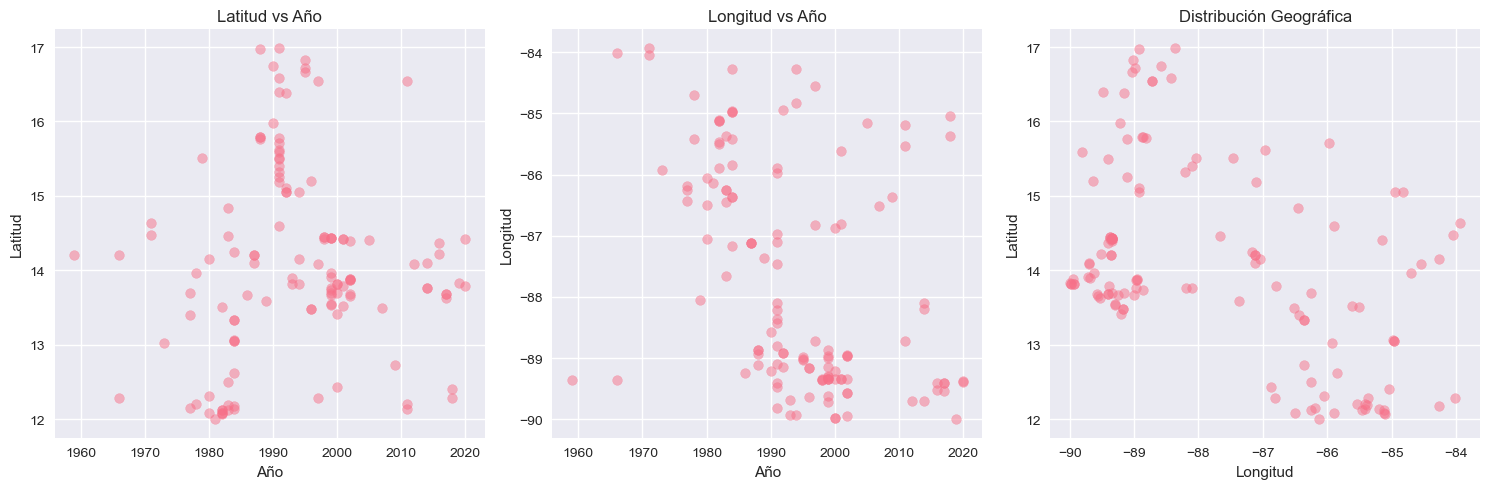

Correlación Latitud-Año: 0.060
Correlación Longitud-Año: -0.430


In [18]:
# Análisis de correlación entre coordenadas y año para especies
if all(col in especies_puntos_clean.columns for col in ['dec_lat', 'dec_long', 'event_year']):
    print("=== CORRELACIÓN COORDENADAS-TIEMPO ===")
    
    # Filtrar datos válidos
    datos_coords_tiempo = especies_puntos_clean[
        (especies_puntos_clean['event_year'] >= 1950) & 
        (especies_puntos_clean['event_year'] <= 2025) &
        (especies_puntos_clean['dec_lat'].between(12, 17)) &
        (especies_puntos_clean['dec_long'].between(-90, -82))
    ]
    
    # Scatter plot latitud vs año
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(datos_coords_tiempo['event_year'], datos_coords_tiempo['dec_lat'], alpha=0.5)
    plt.xlabel('Año')
    plt.ylabel('Latitud')
    plt.title('Latitud vs Año')
    
    plt.subplot(1, 3, 2)
    plt.scatter(datos_coords_tiempo['event_year'], datos_coords_tiempo['dec_long'], alpha=0.5)
    plt.xlabel('Año')
    plt.ylabel('Longitud')
    plt.title('Longitud vs Año')
    
    plt.subplot(1, 3, 3)
    plt.scatter(datos_coords_tiempo['dec_long'], datos_coords_tiempo['dec_lat'], alpha=0.5)
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.title('Distribución Geográfica')
    
    plt.tight_layout()
    plt.show()
    
    # Correlaciones
    corr_lat_año = datos_coords_tiempo['dec_lat'].corr(datos_coords_tiempo['event_year'])
    corr_long_año = datos_coords_tiempo['dec_long'].corr(datos_coords_tiempo['event_year'])
    
    print(f"Correlación Latitud-Año: {corr_lat_año:.3f}")
    print(f"Correlación Longitud-Año: {corr_long_año:.3f}")

## 9. Ingeniería de Características (Feature Engineering)

In [19]:
# Crear nuevas características para especies
print("=== INGENIERÍA DE CARACTERÍSTICAS - ESPECIES ===")

# 1. Período de tiempo
if 'event_year' in especies_puntos_clean.columns:
    especies_puntos_clean['periodo'] = pd.cut(especies_puntos_clean['event_year'], 
                                            bins=[1800, 1950, 1980, 2000, 2010, 2025],
                                            labels=['Histórico', 'Clásico', 'Moderno', 'Reciente', 'Actual'])

# 2. Región geográfica aproximada
if all(col in especies_puntos_clean.columns for col in ['dec_lat', 'dec_long']):
    def clasificar_region(lat, long):
        if lat > 15.5:
            return 'Norte'
        elif lat < 13.5:
            return 'Sur'
        elif long < -87:
            return 'Oeste'
        else:
            return 'Este'
    
    especies_puntos_clean['region'] = especies_puntos_clean.apply(
        lambda row: clasificar_region(row['dec_lat'], row['dec_long']), axis=1
    )

# 3. Familia/género de la especie
if 'sci_name' in especies_puntos_clean.columns:
    especies_puntos_clean['genero'] = especies_puntos_clean['sci_name'].str.split().str[0]

print("✅ Nuevas características creadas:")
print("- Período temporal")
print("- Región geográfica")
print("- Género de la especie")

# Mostrar distribución de las nuevas características
if 'periodo' in especies_puntos_clean.columns:
    print("\nDistribución por período:")
    print(especies_puntos_clean['periodo'].value_counts())

if 'region' in especies_puntos_clean.columns:
    print("\nDistribución por región:")
    print(especies_puntos_clean['region'].value_counts())

=== INGENIERÍA DE CARACTERÍSTICAS - ESPECIES ===
✅ Nuevas características creadas:
- Período temporal
- Región geográfica
- Género de la especie

Distribución por período:
periodo
Moderno      561
Reciente     258
Clásico      226
Actual       116
Histórico     88
Name: count, dtype: int64

Distribución por región:
region
Norte    811
Sur      317
Oeste    141
Este      15
Name: count, dtype: int64


In [20]:
# Crear características para áreas protegidas
print("=== INGENIERÍA DE CARACTERÍSTICAS - ÁREAS PROTEGIDAS ===")

# 1. Categoría de tamaño de área
if 'GIS_AREA' in areas_protegidas_clean.columns:
    areas_protegidas_clean['categoria_tamaño'] = pd.cut(areas_protegidas_clean['GIS_AREA'],
                                                       bins=[0, 10, 100, 1000, float('inf')],
                                                       labels=['Pequeña', 'Mediana', 'Grande', 'Muy Grande'])

# 2. Tipo de protección simplificado
if 'DESIG_ENG' in areas_protegidas_clean.columns:
    def simplificar_tipo(tipo):
        tipo_lower = str(tipo).lower()
        if 'park' in tipo_lower:
            return 'Parque'
        elif 'reserve' in tipo_lower:
            return 'Reserva'
        elif 'refuge' in tipo_lower:
            return 'Refugio'
        elif 'monument' in tipo_lower:
            return 'Monumento'
        else:
            return 'Otro'
    
    areas_protegidas_clean['tipo_simplificado'] = areas_protegidas_clean['DESIG_ENG'].apply(simplificar_tipo)

print("✅ Nuevas características creadas para áreas protegidas:")
print("- Categoría de tamaño")
print("- Tipo de protección simplificado")

# Mostrar distribuciones
if 'categoria_tamaño' in areas_protegidas_clean.columns:
    print("\nDistribución por tamaño:")
    print(areas_protegidas_clean['categoria_tamaño'].value_counts())

if 'tipo_simplificado' in areas_protegidas_clean.columns:
    print("\nDistribución por tipo simplificado:")
    print(areas_protegidas_clean['tipo_simplificado'].value_counts())

=== INGENIERÍA DE CARACTERÍSTICAS - ÁREAS PROTEGIDAS ===
✅ Nuevas características creadas para áreas protegidas:
- Categoría de tamaño
- Tipo de protección simplificado

Distribución por tamaño:
categoria_tamaño
Grande        53
Mediana       30
Pequeña       24
Muy Grande    11
Name: count, dtype: int64

Distribución por tipo simplificado:
tipo_simplificado
Reserva      43
Parque       28
Otro         24
Refugio      15
Monumento     8
Name: count, dtype: int64


## 10. Modelos Predictivos

=== MODELO 1: PREDICCIÓN DE REGIÓN GEOGRÁFICA ===

Resultados Random Forest:
Accuracy: 1.000

Reporte de clasificación:
              precision    recall  f1-score   support

        Este       1.00      1.00      1.00         3
       Norte       1.00      1.00      1.00         5
       Oeste       1.00      1.00      1.00        15
         Sur       1.00      1.00      1.00         8

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



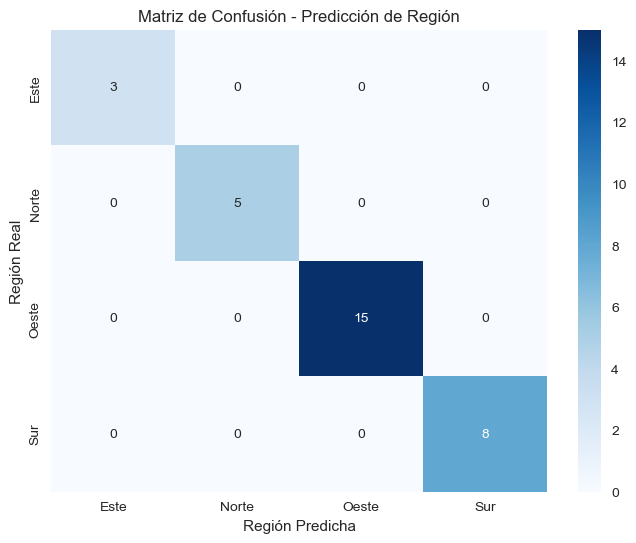

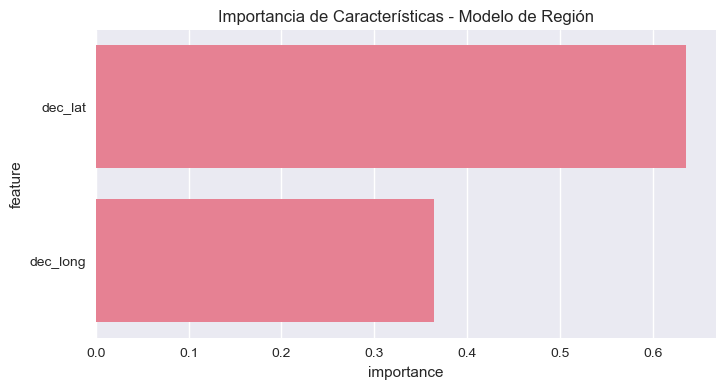

In [21]:
# Preparación de datos para modelado - Predicción de región basada en coordenadas
print("=== MODELO 1: PREDICCIÓN DE REGIÓN GEOGRÁFICA ===")

# Filtrar datos válidos
datos_modelo1 = especies_puntos_clean[
    (especies_puntos_clean['dec_lat'].between(12, 17)) &
    (especies_puntos_clean['dec_long'].between(-90, -82)) &
    (especies_puntos_clean['region'].notna())
].copy()

if len(datos_modelo1) > 100:  # Suficientes datos para modelar
    # Preparar características y variable objetivo
    X = datos_modelo1[['dec_lat', 'dec_long']]
    y = datos_modelo1['region']
    
    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Modelo Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predicciones
    y_pred_rf = rf_model.predict(X_test)
    
    # Evaluación
    print("\nResultados Random Forest:")
    print(f"Accuracy: {rf_model.score(X_test, y_test):.3f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred_rf))
    
    # Matriz de confusión
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=rf_model.classes_, 
                yticklabels=rf_model.classes_)
    plt.title('Matriz de Confusión - Predicción de Región')
    plt.ylabel('Región Real')
    plt.xlabel('Región Predicha')
    plt.show()
    
    # Importancia de características
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(8, 4))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Importancia de Características - Modelo de Región')
    plt.show()
    
else:
    print("No hay suficientes datos válidos para el modelo de predicción de región")

=== MODELO 2: PREDICCIÓN DE PERÍODO TEMPORAL ===

Accuracy: 0.769

Reporte de clasificación:
              precision    recall  f1-score   support

      Actual       0.00      0.00      0.00         1
     Clásico       0.00      0.00      0.00         3
     Moderno       0.77      0.94      0.85        18
    Reciente       1.00      0.75      0.86         4

    accuracy                           0.77        26
   macro avg       0.44      0.42      0.43        26
weighted avg       0.69      0.77      0.72        26



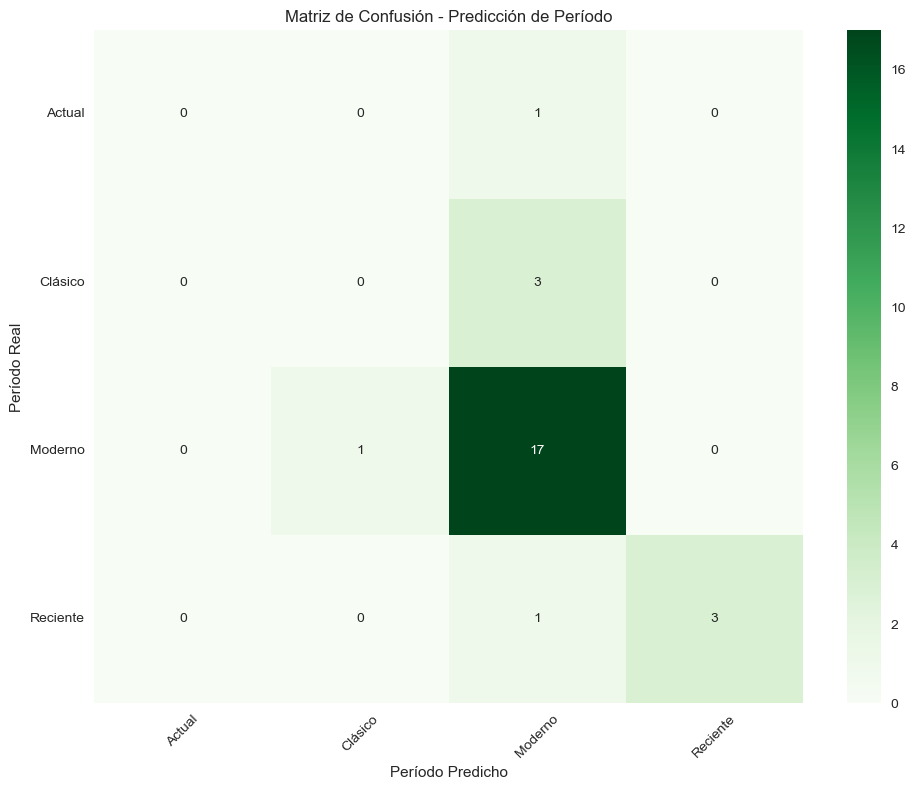

In [22]:
# Modelo 2: Predicción de período temporal basado en coordenadas
print("=== MODELO 2: PREDICCIÓN DE PERÍODO TEMPORAL ===")

# Filtrar datos válidos
datos_modelo2 = especies_puntos_clean[
    (especies_puntos_clean['dec_lat'].between(12, 17)) &
    (especies_puntos_clean['dec_long'].between(-90, -82)) &
    (especies_puntos_clean['event_year'].between(1950, 2025)) &
    (especies_puntos_clean['periodo'].notna())
].copy()

if len(datos_modelo2) > 100:
    # Preparar datos
    X2 = datos_modelo2[['dec_lat', 'dec_long']]
    y2 = datos_modelo2['periodo']
    
    # División de datos
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
    
    # Modelo Random Forest
    rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model2.fit(X2_train, y2_train)
    
    # Predicciones
    y2_pred = rf_model2.predict(X2_test)
    
    # Evaluación
    print(f"\nAccuracy: {rf_model2.score(X2_test, y2_test):.3f}")
    print("\nReporte de clasificación:")
    print(classification_report(y2_test, y2_pred))
    
    # Matriz de confusión
    plt.figure(figsize=(10, 8))
    cm2 = confusion_matrix(y2_test, y2_pred)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', 
                xticklabels=rf_model2.classes_, 
                yticklabels=rf_model2.classes_)
    plt.title('Matriz de Confusión - Predicción de Período')
    plt.ylabel('Período Real')
    plt.xlabel('Período Predicho')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
else:
    print("No hay suficientes datos válidos para el modelo de predicción de período")

=== MODELO 3: PREDICCIÓN DE AÑO (REGRESIÓN) ===

Resultados Random Forest Regressor:
R² Score: 0.193
RMSE: 9.52 años

Resultados Regresión Lineal:
R² Score: 0.191
RMSE: 9.53 años


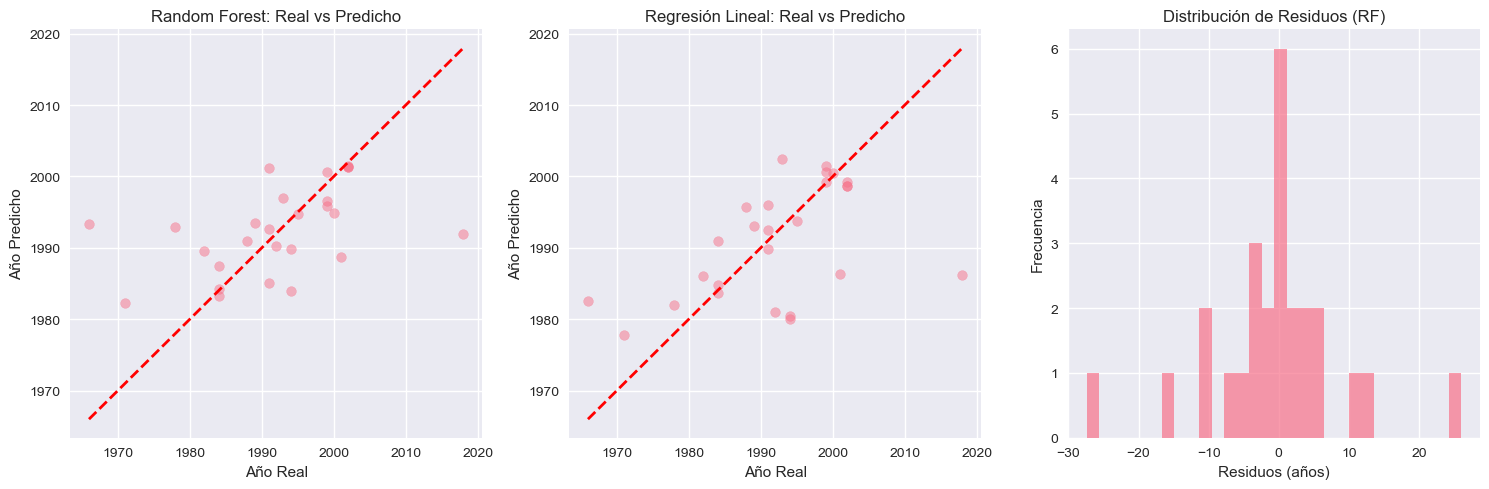

In [23]:
# Modelo 3: Regresión - Predicción de año basado en coordenadas
print("=== MODELO 3: PREDICCIÓN DE AÑO (REGRESIÓN) ===")

# Filtrar datos válidos
datos_modelo3 = especies_puntos_clean[
    (especies_puntos_clean['dec_lat'].between(12, 17)) &
    (especies_puntos_clean['dec_long'].between(-90, -82)) &
    (especies_puntos_clean['event_year'].between(1950, 2025))
].copy()

if len(datos_modelo3) > 100:
    # Preparar datos
    X3 = datos_modelo3[['dec_lat', 'dec_long']]
    y3 = datos_modelo3['event_year']
    
    # División de datos
    X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
    
    # Estandarización
    scaler = StandardScaler()
    X3_train_scaled = scaler.fit_transform(X3_train)
    X3_test_scaled = scaler.transform(X3_test)
    
    # Modelo Random Forest Regressor
    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_reg.fit(X3_train, y3_train)
    
    # Predicciones
    y3_pred_rf = rf_reg.predict(X3_test)
    
    # Modelo de Regresión Lineal
    lr_model = LinearRegression()
    lr_model.fit(X3_train_scaled, y3_train)
    y3_pred_lr = lr_model.predict(X3_test_scaled)
    
    # Evaluación
    print("\nResultados Random Forest Regressor:")
    print(f"R² Score: {r2_score(y3_test, y3_pred_rf):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y3_test, y3_pred_rf)):.2f} años")
    
    print("\nResultados Regresión Lineal:")
    print(f"R² Score: {r2_score(y3_test, y3_pred_lr):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y3_test, y3_pred_lr)):.2f} años")
    
    # Visualización de predicciones
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(y3_test, y3_pred_rf, alpha=0.5)
    plt.plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], 'r--', lw=2)
    plt.xlabel('Año Real')
    plt.ylabel('Año Predicho')
    plt.title('Random Forest: Real vs Predicho')
    
    plt.subplot(1, 3, 2)
    plt.scatter(y3_test, y3_pred_lr, alpha=0.5)
    plt.plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], 'r--', lw=2)
    plt.xlabel('Año Real')
    plt.ylabel('Año Predicho')
    plt.title('Regresión Lineal: Real vs Predicho')
    
    plt.subplot(1, 3, 3)
    residuos_rf = y3_test - y3_pred_rf
    plt.hist(residuos_rf, bins=30, alpha=0.7)
    plt.xlabel('Residuos (años)')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Residuos (RF)')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No hay suficientes datos válidos para el modelo de regresión")

In [26]:
# Guardar datos procesados
try:
    # Guardar datasets limpios
    areas_protegidas_clean.to_csv('data_limpios/areas_protegidas_procesadas.csv', index=False)
    especies_puntos_clean.to_csv('data_limpios/especies_procesadas.csv', index=False)
    
except Exception as e:
    print(f" Error al guardar: {e}")

